In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rc

In [2]:
ratios = ['1/5','1/4', '1/3', '1/2', '1', '2', '3', '4','5']
def get_data_list(metric,day,data_source,data_df):
    directory = 'outputs'
    for f in os.listdir(directory):
        if metric in f and day in f and data_source in f:
            df = pd.read_csv(directory+'/'+f,index_col=0)
            df = pd.DataFrame(np.abs(df.values),columns=df.columns if len(df.columns)>2 else [metric])
            if len(df.columns)<2 and 'TRM' in df.columns:
                print('error')
            graph_n = f.replace(metric+'_'+day,'').replace(data_source+'.csv','')
            if graph_n in data_df[data_df.source == data_source].graph.values:
                start_ind = list((data_df.source == data_source) & (data_df.graph == graph_n)).index(True)
                if df.shape[1]>1:
                    for i in range(df.shape[1]):
                        for j in range(df.shape[0]):
                            data_df.iloc[start_ind+j,i+int(metric=='runtimes')*df.shape[1]] = df.iloc[j,i]
                else:
                    for j in range(df.shape[0]):
                        data_df.iloc[start_ind+j,list(data_df.columns).index(metric)] = df.iloc[j,0]
            else:
                if df.shape[1]>2:
                    df.columns = [col for col in data_df.columns if metric in col]
                    for col in data_df.columns:
                        if not (col in df.columns):
                            df[col] = [np.nan]*df.shape[0]
                print
                df['graph'] = [graph_n]*df.shape[0]
                df['source'] = [data_source]*df.shape[0]
                df['ratios_ind'] = range(df.shape[0])
                df['day'] = [day]*df.shape[0]
                data_df = data_df.append(df,ignore_index=True)
                
    return data_df


In [3]:
sources = ['citi','capit','blue']
score_cols = ['TRM_scores', 'HS_scores', 'IHS_scores','GHS_scores','Local Ratio_scores']
det_cols = ['TRM_det', 'HS_det', 'IHS_det','GHS_det','Local Ratio_det']
rt_cols = ['TRM_runtimes', 'HS_runtimes',   'IHS_runtimes','GHS_runtimes','Local Ratio_runtimes']
#score_cols = ['TRM_scores', 'HS_scores', 'IHS_scores']
#rt_cols = ['TRM_runtimes', 'HS_runtimes', 'IHS_runtimes']


df = pd.DataFrame(columns=score_cols+ rt_cols+['graph','graphs','sdists','source'],)
for metric in ['sdists','graphs','runtimes','scores']:
    for day in ['weekend','weekday']:
        for source in sources:
            df=get_data_list(metric,day,source,df)

df = df.loc[df['Local Ratio_runtimes']<1500,:]
for col in score_cols+rt_cols+['sdists','graphs']:
    df[col]=pd.to_numeric(df[col])
for col in score_cols:
    df[col.split('_')[0]+'_det'] = df[col]-df['sdists']
df

,TRM_scores,HS_scores,IHS_scores,GHS_scores,Local Ratio_scores,TRM_runtimes,HS_runtimes,IHS_runtimes,GHS_runtimes,Local Ratio_runtimes,...,graphs,sdists,source,ratios_ind,day,TRM_det,HS_det,IHS_det,GHS_det,Local Ratio_det
0,45636.758726,43217.837973,43260.871318,44175.106860,43217.837973,0.049123,0.071585,0.094612,15.423684,1.694590,...,105,42362.713827,citi,0.0,weekend,3274.044899,855.124146,898.157491,1812.393033,855.124146
1,48454.533328,38983.682450,34245.795477,43987.845304,34126.967768,0.028538,0.121616,0.109211,16.392034,2.430591,...,108,33507.069524,citi,1.0,weekend,14947.463804,5476.612926,738.725953,10480.775780,619.898244
2,67663.903796,49299.743058,48601.037220,49420.339920,46015.681070,0.030054,0.104622,0.105375,16.206555,2.998638,...,112,43998.202613,citi,2.0,weekend,23665.701183,5301.540446,4602.834608,5422.137307,2017.478457
3,96818.474249,77143.635667,76972.640833,82940.495774,76010.744350,0.033268,0.189626,0.142045,16.934821,4.912192,...,120,55532.254066,citi,3.0,weekend,41286.220184,21611.381601,21440.386767,27408.241708,20478.490284
4,241705.304416,235431.921684,233489.836444,233721.795194,232934.062690,0.045105,0.344615,0.560849,18.445323,12.475120,...,144,143523.689099,citi,4.0,weekend,98181.615317,91908.232585,89966.147345,90198.106095,89410.373591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,210384.848880,207501.289405,206902.653322,208897.899799,206534.705764,0.060117,0.474559,0.437509,21.233748,22.330859,...,168,134792.757985,blue,4.0,weekday,75592.090895,72708.531420,72109.895336,74105.141814,71741.947779
4973,338528.599853,337779.234214,337634.019140,337335.221343,335244.074711,1.106060,7.934598,4.403799,179.517430,56.411026,...,224,302541.105417,blue,5.0,weekday,35987.494435,35238.128797,35092.913723,34794.115925,32702.969293
4974,456334.302330,450381.745120,455094.922037,449672.313641,448856.358881,2.107036,15.307505,10.863172,315.595920,98.612738,...,280,421969.521762,blue,6.0,weekday,34364.780567,28412.223358,33125.400275,27702.791879,26886.837119
4975,672464.041473,663038.120143,670065.638080,665584.495030,664479.564779,3.156068,19.328861,16.173036,484.124445,162.604697,...,336,636184.103138,blue,7.0,weekday,36279.938335,26854.017006,33881.534943,29400.391893,28295.461641


In [4]:
df.graph.nunique()

186

In [5]:
def get_det_group(df, source,day):
    if not (day is None):
        df = df[df['day']==day]
    capit_we = df.loc[(df.source==source),:].copy()
    df_temp = pd.DataFrame()
    det_cols = []
    for c in score_cols:
        det_col = c.split('_')[0]+'_det'
        det_cols.append(det_col)
        df_temp[det_col] = pd.to_numeric(arg=(capit_we[c].values-capit_we['sdists'].values)/capit_we['sdists'].values)
    df_temp['ratios_ind'] = capit_we.ratios_ind.values
    return df_temp, det_cols


citi


<ipython-input-6-2f75184c226a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


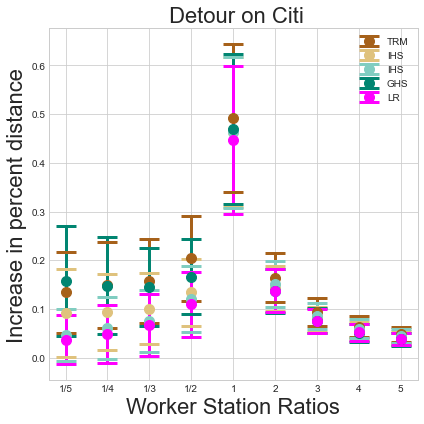

capit


<ipython-input-6-2f75184c226a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


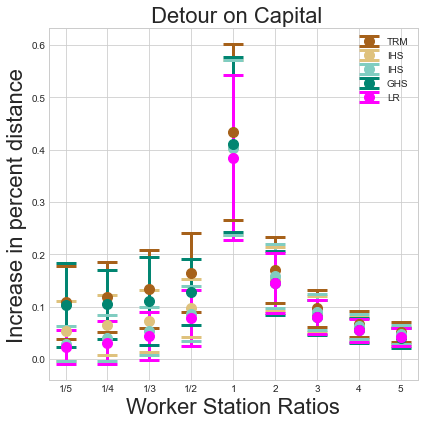

blue


<ipython-input-6-2f75184c226a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


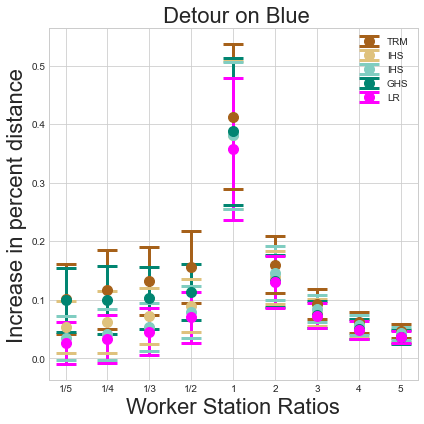

citi


<ipython-input-6-2f75184c226a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


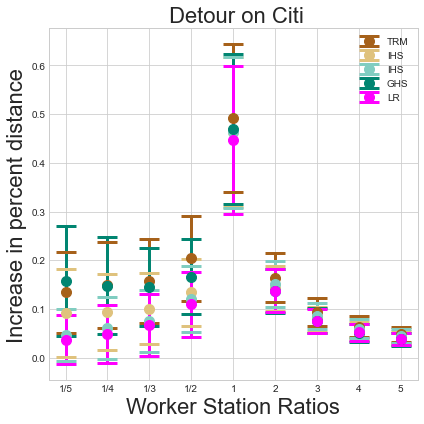

capit


<ipython-input-6-2f75184c226a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


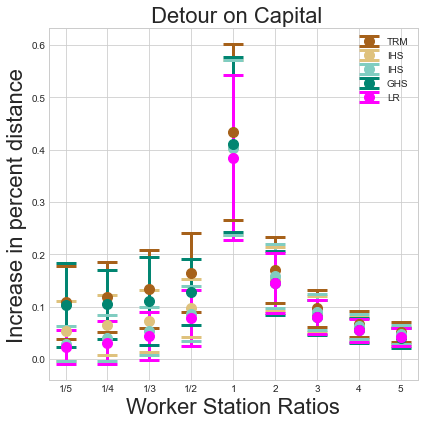

blue


<ipython-input-6-2f75184c226a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


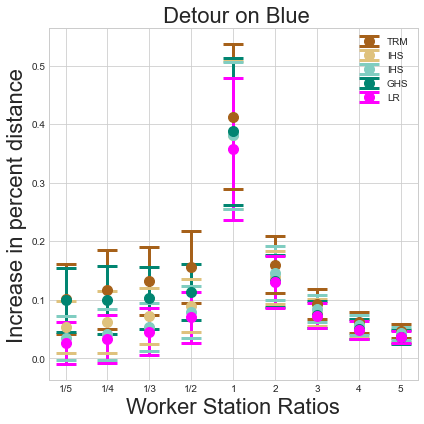

<ipython-input-6-2f75184c226a>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


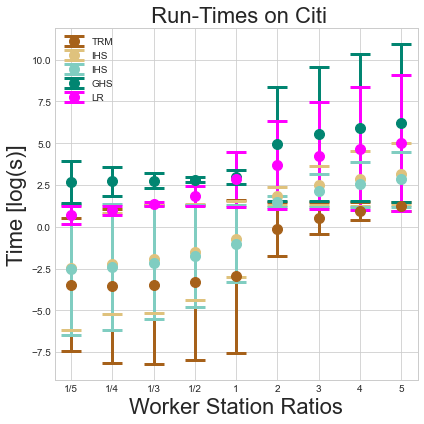

<ipython-input-6-2f75184c226a>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


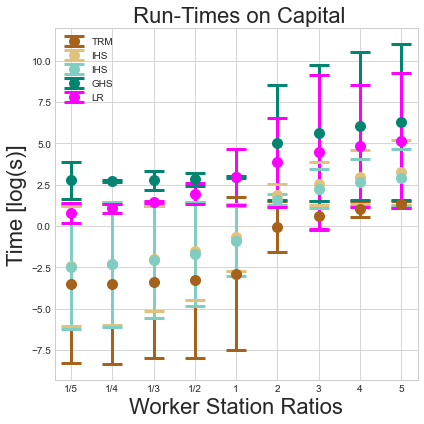

<ipython-input-6-2f75184c226a>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


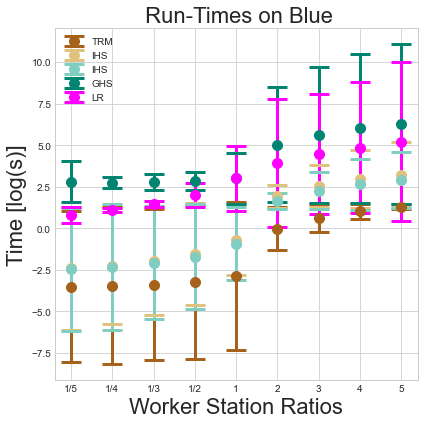

In [6]:
font = {'size'   : 22}
plt.style.use('seaborn-whitegrid')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571','#FF00FF']


def plot_ratio(df, source,day):
    plt.style.use('seaborn-whitegrid')
    temp_df, det_cols = get_det_group(df,source,day)
    print(source)
    group = temp_df.groupby('ratios_ind')
    fig, ax = plt.subplots()
    if day is None:
        day = ""
    color = 0
    for c in det_cols: 
        label = c.split('_')[0].replace("Local Ratio","LR")
        label = 'IHS' if label=='HS' else label
        ax.errorbar(group.groups.keys(), group[c].mean(), yerr=group[c].std(),label=label,fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
        color +=1
    color = 0
    plt.title(' Detour on ' +source.capitalize().replace('pit','pital'),**font)
    plt.legend()
    ax.set_ylabel('Increase in percent distance',**font)
    ax.set_xlabel('Worker Station Ratios',**font)
    ax.set_xticklabels([0]+ratios)
    fig.set_size_inches(6, 6)
    
    fig.tight_layout()
    fig.savefig('figures/'+source+'_'+day+'scores_rats')
    plt.show()
for source in sources:
    for day in [None]:
        plot_ratio(df,source,day)


def plot_ratio_err(df, source,day):
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots()
    if not (day is None):
        df = df.loc[(df.day==day)]
    else:
        day = ""
    df = df.loc[(df.source == source) ]
    group = df.groupby('ratios_ind')
    color = 0
    for c in rt_cols: 
        label = c.split('_')[0].replace("Local Ratio","LR")
        label = 'IHS' if label=='HS' else label
        ax.errorbar(group.groups.keys(), np.log(group[c].mean()), yerr=np.log(group[c].std()),label=label,fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
        color +=1
    color = 0
    plt.title(' Run-Times on ' +source.capitalize().replace('pit','pital'),**font)
    plt.legend()
    ax.set_ylabel('Time [log(s)]',**font)
    ax.set_xlabel('Worker Station Ratios',**font)
    ax.set_xticklabels([0]+ratios)
    fig.set_size_inches(6, 6)
    
    fig.tight_layout()
    fig.savefig('figures/'+source+'_'+day+'rt_err')
    plt.show()
for source in sources:
    for day in [None]:
        plot_ratio(df,source,day)   

def plot_rt(df, source, day):
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots()
    if not (day is None):
        df = df.loc[(df.day==day)]
    else:
        day = ""
    df = df.loc[(df.source == source) ]
    color = 0
    for c in rt_cols: 
        label = c.split('_')[0].replace("Local Ratio","LR")
        label = 'IHS' if label=='HS' else label
        ax.scatter(df['graphs'], np.log(df[c]),label=label,c=colors[color])
        color +=1
    color = 0
    plt.title(' Run-times on '+source.capitalize().replace('pit','pital'),**font)
    ax.set_ylabel('Run-time',**font)
    ax.set_xlabel('Graph Size',**font)
    fig.set_size_inches(6, 6)
    plt.legend()
    fig.tight_layout()
    fig.savefig('figures/'+source+'_'+day+'_rts_log')
    plt.show()
for source in sources:
    for day in [None]:
        plot_ratio_err(df,source,day)

<ipython-input-7-72ef97702d58>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


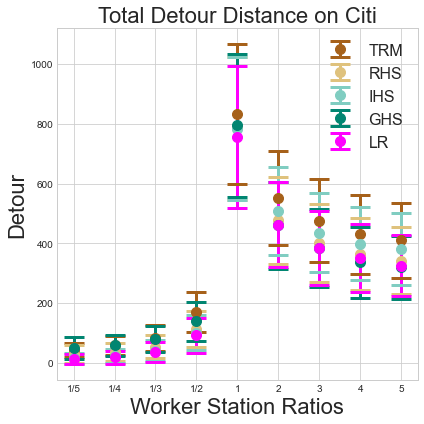

<ipython-input-7-72ef97702d58>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


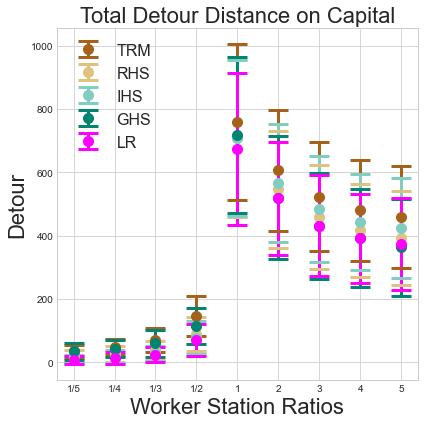

<ipython-input-7-72ef97702d58>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+ratios)


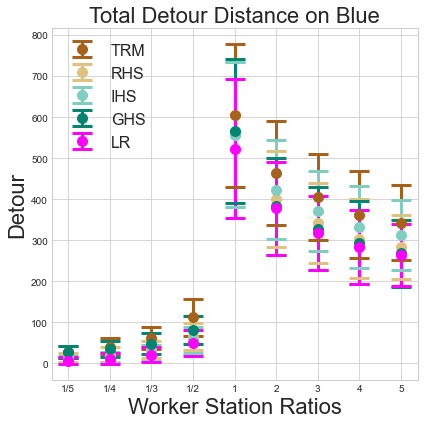

In [7]:
def plot_det(df, source, day):
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots()
    if not (day is None):
        df = df.loc[(df.day==day)]
    else:
        day = ""
    group = df.loc[(df.source == source) ].groupby('ratios_ind')
    color = 0
    for c in det_cols: 
        label = c.split('_')[0].replace("Local Ratio","LR")
        label = 'RHS' if label=='HS' else label
        ax.errorbar(group.groups.keys(),(group[c]).mean()/100,label=label,  yerr=group[c].std()/100,
        fmt='o',c=colors[color],ms=10,capsize=10,capthick=3,elinewidth=3)
        color +=1
    color = 0
    plt.title('Total Detour Distance on '+ source.capitalize().replace('Capit','Capital'),**font)
    ax.set_ylabel('Detour',**font)
    ax.set_xlabel('Worker Station Ratios',**font)
    ax.set_xticklabels([0]+ratios)
    plt.legend(fontsize=16)
    fig.set_size_inches(6, 6)
    
    fig.tight_layout()
    fig.savefig('figures/'+source+'_'+day+'dets')
    plt.show()
for source in sources:
    for day in [None]:
        plot_det(df,source,day)

In [8]:
day='weekday'
latex,det_cols = get_det_group(df,sources[0],day)
latex = latex.groupby('ratios_ind').mean()
if len(sources)>1:
    for source in sources[1:]:
        latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['ratios_ind']].groupby('ratios_ind').mean().astype(int))

for source in sources:
    latex.append(df.loc[(df.source == source) & (df.day==day),score_cols+['ratios_ind']].groupby('ratios_ind').mean().astype(int))

In [9]:
temp_agg = pd.DataFrame()

for source in sources:
    temp_=pd.DataFrame(columns=['TRMciti',  'Local Ratiociti', 'HSciti', 'GHSciti','IHSciti', 'TRMcapital' ,
                            'Local Ratiocapital' ,  'HScapital' ,  'GHScapital' ,  'IHScapital' ,  'TRMblue',
                            'Local Ratioblue' ,  'HSblue' ,  'GHSblue' ,  'IHSblue' ])
    for day in [None]:
        temp = get_det_group(df,source,day)[0].groupby('ratios_ind').mean()
        temp.columns = [c.split('_')[0]+source for c in temp.columns]
        temp_=temp_.append(temp)
    for c in temp.columns:
        temp_agg[c]=np.round(temp_[c].values,2)

temp_agg.index = ratios
for i in range(len(temp_agg.index)):
    for j in [0,5,10]:
        m = np.min(temp_agg.iloc[i,range(j,j+5)].values)
        for j_ in range(j,j+5):
            if temp_agg.iloc[i,j_] <= m+0.01:
                temp_agg.iloc[i,j_] = '\\textbf{'+str(temp_agg.iloc[i,j_])+'}'

latex = temp_agg.to_latex()
latex = latex.replace('\\textbackslash textbf\\{','\\textbf{').replace('\\}','}')
print(latex)

\begin{tabular}{llllllllllllllll}
\toprule
{} &        TRMciti &         HSciti &        IHSciti &        GHSciti & Local Ratiociti &       TRMcapit &        HScapit &       IHScapit &       GHScapit & Local Ratiocapit &        TRMblue &         HSblue &        IHSblue &        GHSblue & Local Ratioblue \\
\midrule
1/5 &           0.13 &           0.09 &  \textbf{0.05} &           0.16 &   \textbf{0.04} &           0.11 &           0.05 &  \textbf{0.03} &            0.1 &    \textbf{0.02} &            0.1 &           0.05 &  \textbf{0.03} &            0.1 &   \textbf{0.03} \\
1/4 &           0.15 &           0.09 &  \textbf{0.06} &           0.15 &   \textbf{0.05} &           0.12 &           0.06 &  \textbf{0.04} &            0.1 &    \textbf{0.03} &           0.12 &           0.06 &  \textbf{0.04} &            0.1 &   \textbf{0.03} \\
1/3 &           0.16 &            0.1 &  \textbf{0.08} &           0.15 &   \textbf{0.07} &           0.13 &           0.07 &  \textbf{0.05} &         

In [10]:

temp_agg = pd.DataFrame()

for source in sources:
    temp_=pd.DataFrame(columns=['TRMciti',  'Local Ratiociti', 'HSciti', 'GHSciti','IHSciti', 'TRMcapital' ,
                            'Local Ratiocapital' ,  'HScapital' ,  'GHScapital' ,  'IHScapital' ,  'TRMblue',
                            'Local Ratioblue' ,  'HSblue' ,  'GHSblue' ,  'IHSblue' ])
    for day in [None]:
        if not(day is None):
            df.loc[df.day==day]
        temp = df.loc[(df.source == source),['ratios_ind']+rt_cols].groupby('ratios_ind').mean()
        temp.index = [str(i) for i in temp.index]
        temp.columns = [c.split('_')[0]+source for c in temp.columns]
        temp_=temp_.append(temp)
    for c in temp.columns:
        temp_agg[c]=np.round(temp_[c].values,2)

temp_agg.index = ratios
for i in range(len(temp_agg.index)):
    for j in [0,5,10]:
        m = np.min(temp_agg.iloc[i,range(j,j+5)].values)
        for j_ in range(j,j+5):
            if temp_agg.iloc[i,j_] < m+0.01:
                temp_agg.iloc[i,j_] = '\\textbf{'+str(temp_agg.iloc[i,j_])+'}'
latex = temp_agg.to_latex()
latex = latex.replace('\\textbackslash textbf\\{','\\textbf{').replace('\\}','}')
print(latex)

\begin{tabular}{llrrrrlrrrrlrrrr}
\toprule
{} &        TRMciti &  HSciti &  IHSciti &  GHSciti &  Local Ratiociti &       TRMcapit &  HScapit &  IHScapit &  GHScapit &  Local Ratiocapit &        TRMblue &  HSblue &  IHSblue &  GHSblue &  Local Ratioblue \\
\midrule
1/5 &  \textbf{0.03} &    0.09 &     0.08 &    14.36 &             2.04 &  \textbf{0.03} &     0.09 &      0.09 &     15.88 &              2.23 &  \textbf{0.03} &    0.09 &     0.08 &    16.26 &             2.26 \\
1/4 &  \textbf{0.03} &    0.11 &     0.09 &    15.10 &             2.68 &  \textbf{0.03} &     0.10 &      0.10 &     15.32 &              2.95 &  \textbf{0.03} &    0.10 &     0.10 &    15.40 &             3.00 \\
1/3 &  \textbf{0.03} &    0.14 &     0.12 &    15.70 &             3.84 &  \textbf{0.03} &     0.14 &      0.13 &     15.81 &              4.20 &  \textbf{0.03} &    0.14 &     0.13 &    16.09 &             4.33 \\
1/2 &  \textbf{0.04} &    0.22 &     0.17 &    16.74 &             6.40 &  \textbf{0.04} 

In [11]:
df.head()

,TRM_scores,HS_scores,IHS_scores,GHS_scores,Local Ratio_scores,TRM_runtimes,HS_runtimes,IHS_runtimes,GHS_runtimes,Local Ratio_runtimes,...,graphs,sdists,source,ratios_ind,day,TRM_det,HS_det,IHS_det,GHS_det,Local Ratio_det
0,45636.758726,43217.837973,43260.871318,44175.106860,43217.837973,0.049123,0.071585,0.094612,15.423684,1.694590,...,105,42362.713827,citi,0.0,weekend,3274.044899,855.124146,898.157491,1812.393033,855.124146
1,48454.533328,38983.682450,34245.795477,43987.845304,34126.967768,0.028538,0.121616,0.109211,16.392034,2.430591,...,108,33507.069524,citi,1.0,weekend,14947.463804,5476.612926,738.725953,10480.775780,619.898244
2,67663.903796,49299.743058,48601.037220,49420.339920,46015.681070,0.030054,0.104622,0.105375,16.206555,2.998638,...,112,43998.202613,citi,2.0,weekend,23665.701183,5301.540446,4602.834608,5422.137307,2017.478457
3,96818.474249,77143.635667,76972.640833,82940.495774,76010.744350,0.033268,0.189626,0.142045,16.934821,4.912192,...,120,55532.254066,citi,3.0,weekend,41286.220184,21611.381601,21440.386767,27408.241708,20478.490284
4,241705.304416,235431.921684,233489.836444,233721.795194,232934.062690,0.045105,0.344615,0.560849,18.445323,12.475120,...,144,143523.689099,citi,4.0,weekend,98181.615317,91908.232585,89966.147345,90198.106095,89410.373591


In [13]:
df.graph.nunique()

186

62.0